In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table

meas = Base.classes.measurement
stat = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

mrd = session.query(meas.date).order_by(meas.date.desc()).first()
print(mrd)



('2017-08-23',)


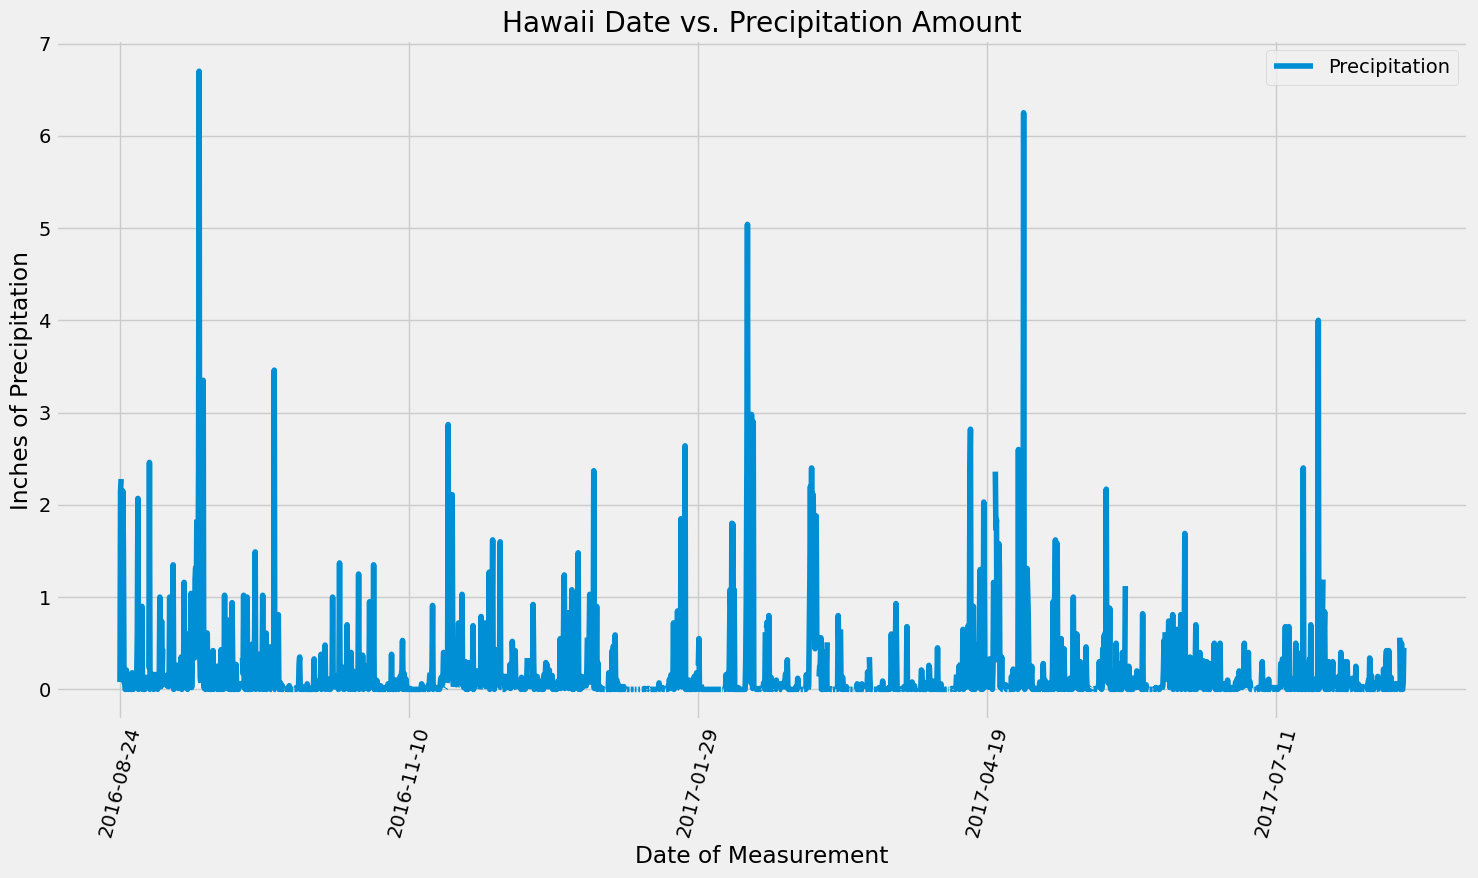

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
#(chinook reference; mod10 class 3)

prec = session.query(meas.date, meas.prcp).filter(meas.date > "2016-08-23").order_by(meas.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

prec_df = pd.DataFrame(prec, columns = ["DateOfMeasurement", "Precipitation"])

# Sort the dataframe by date

prec_df.sort_values(by="DateOfMeasurement")
# prec_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prec_graph = prec_df.plot(title= "Hawaii Date vs. Precipitation Amount",
                          rot=75, 
                          figsize=(15, 9),
                          x="DateOfMeasurement",
                          y="Precipitation",
                          xlabel = "Date of Measurement", ylabel = "Inches of Precipitation")
plt.tight_layout()
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_df["Precipitation"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset

stat_total = session.query(stat.station).count()
stat_total

9

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# group by station, count number of times that station shows up, order by the count number; descending def

most_active = session.query(meas.station,func.count(meas.station)).order_by(func.count(meas.station).desc()).group_by(meas.station).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
mas = most_active[0][0]
mas

'USC00519281'

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most active station = USC00519281

lt = session.query(func.min(meas.tobs)).filter(meas.station == mas).all()
print(f"lowest temp: {lt}")

ht = session.query(func.max(meas.tobs)).filter(meas.station == mas).all()
print(f"highest temp: {ht}")

avgt = session.query(func.avg(meas.tobs)).filter(meas.station == mas).all()
print(f"average temp: {avgt}")

lowest temp: [(54.0,)]
highest temp: [(85.0,)]
average temp: [(71.66378066378067,)]


In [45]:
most_recent = session.query(meas.date, meas.tobs).filter(meas.station == mas).order_by(meas.date.desc()).first()
print(most_recent)

# most recent temp and date observed for the most activate station

('2017-08-18', 79.0)


In [47]:
# Using the most active station id (USC00519281, 2017-08-18)
# Query the last 12 months of temperature observation data for this station and 

mas_12mo = session.query(meas.date, meas.tobs).filter(meas.station == mas). filter(meas.date > "2016-08-18").all()

for val in mas_12mo:
    print(val)

('2016-08-19', 79.0)
('2016-08-20', 81.0)
('2016-08-21', 79.0)
('2016-08-22', 78.0)
('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05'

Text(0.5, 1.0, "Station USC00519281's Annual Temperature vs. Precipitation Changes ")

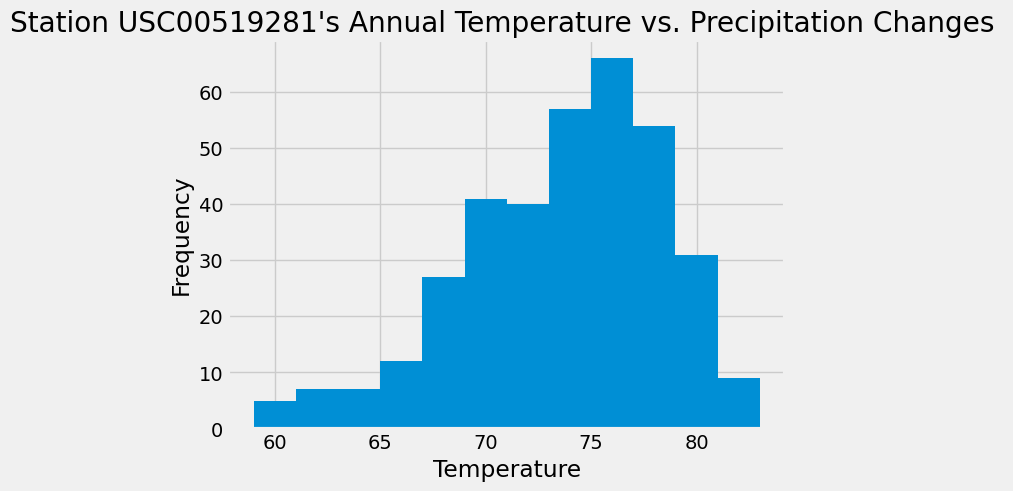

In [52]:
# plot the results of [46] as a histogram
mas_df = pd.DataFrame(mas_12mo)["tobs"]
mas_df

mas_histo = mas_df.hist(bins=12)

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station USC00519281's Annual Temperature vs. Precipitation Changes ")

# Close Session

In [16]:
# Close Session
session.close()